# Detecting and counting rice grains from ain image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

We read and display the grayscale image

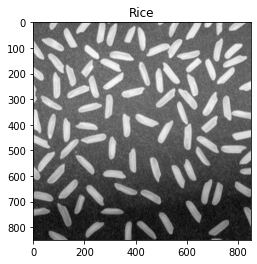

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/images/rice.png", 0)

plt.figure()
plt.title("Rice")
plt.imshow(img1, cmap="gray")

We take a look at its histogram and visually determine a good threshold to separate foreground from background

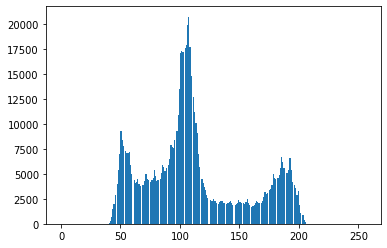

In [ ]:
plt.hist(img1.ravel(), 256, [0, 256])
plt.show()

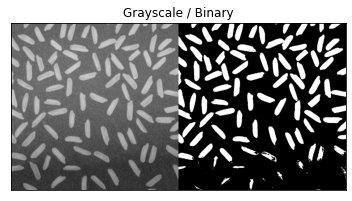

In [ ]:
threshold = 140

ret, img1_binary = cv2.threshold(img1, threshold, 255, cv2.THRESH_BINARY)

plt.imshow(np.hstack((img1, img1_binary)), 'gray', vmin=0, vmax=255)
plt.title("Grayscale / Binary")
plt.xticks([]),plt.yticks([])
plt.show()

Our threshold estimate did not result in the desired output so we equalize the histogram to see if this approach yields better results.

We go for the Contrast Limited Adaptive Histogram Equalization (CLAHE) method since our background is not uniform.

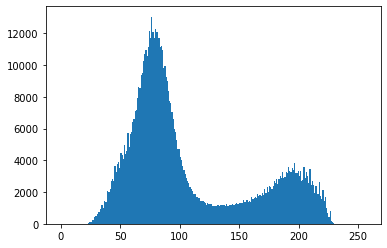

In [ ]:
# img1_equ = cv2.equalizeHist(img1)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img1_equ = clahe.apply(img1)

plt.hist(img1_equ.ravel(), 256, [0, 256])
plt.show()

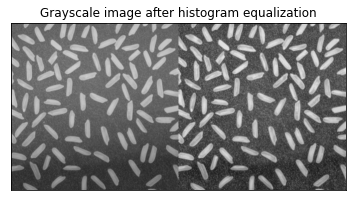

In [ ]:
plt.imshow(np.hstack((img1, img1_equ)), 'gray', vmin=0, vmax=255)
plt.title("Grayscale image after histogram equalization")
plt.xticks([]),plt.yticks([])
plt.show()

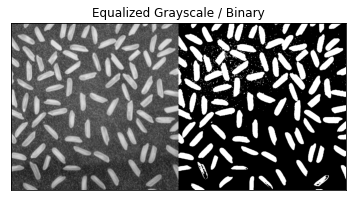

In [ ]:
threshold_equ = 120
ret, img1_equ_binary = cv2.threshold(img1, threshold_equ, 255, cv2.THRESH_BINARY)

plt.imshow(np.hstack((img1_equ, img1_equ_binary)), 'gray', vmin=0, vmax=255)
plt.title("Equalized Grayscale / Binary")
plt.xticks([]),plt.yticks([])
plt.show()

We got better results with the equalized image so we will use it for thresholding purposes.

Next, we find contours for every object (white region)

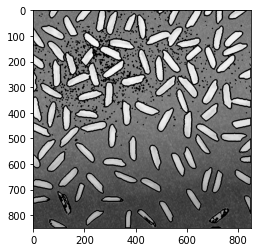

In [ ]:
contours, hierarchy = cv2.findContours(img1_equ_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img1_contour = cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)

plt.imshow(img1_contour, cmap="gray")


Because of the non-uniformity of the background we detect a bunch of false contours. Luckily they are all tiny so we can eliminate them.

We remove the unwanted contours (by looking at their size) and we count the remaining contours.

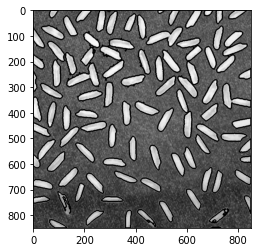

In [ ]:
rows, cols = img1.shape
img1_contour_clean = np.zeros((rows, cols), np.uint8)

number_of_grains = 0
small_size = 50
for i, cnt in enumerate(contours):
  # Draw only if the size of the contour is greater than a threshold
  if  cv2.contourArea(cnt) > small_size:
    number_of_grains += 1
    img1_contour_clean = cv2.drawContours(img1_equ, [cnt], -1, (0, 255, 0), 3)  

plt.imshow(img1_contour_clean, cmap="gray")

In [ ]:
print("We found {:d} grains of rice in this picture.".format(number_of_grains))

We found 97 grains of rice in this picture
